# Load Data

In [171]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
data = pd.read_csv('./data/HR_data.csv', index_col=0)

# Basic Data Analysis

## Start

In [172]:
num_cols = data.columns[:51]
cat_cols = data.columns[51:]

print(num_cols)
print(cat_cols)

Index(['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT'],
      dt

In [3]:
print("Shape data:")
print(data.shape)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
nan_info = data.isnull().sum()
print(nan_info[nan_info != 0])

Shape data:
(312, 67)
First few rows of the dataset:
   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0   78.663878         76.70   7.480043      67.25      92.48  23048.450   
1   76.540732         76.61   2.584756      69.82      82.33  23959.920   
2   78.173563         77.92   2.681255      72.22      82.80  20324.605   
3   83.073688         83.88   7.363598      69.42      96.12  24924.300   
4   72.281250         72.91   3.193762      64.95      79.98  23052.100   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  upset  \
0       -1.091448    0.369955          -0.7300           0.9775  ...    1.0   
1       -0.245338    0.338732          -0.3600           0.1900  ...    2.0   
2       -0.615922   -0.233047          -0.6300           0.3575  ...    1.0   
3       -0.866610   -0.046021          -0.4650           0.6500  ...    1.0   
4        0.200401   -0.560948          -0.3725           0.3375  ...    3.0   

   hostile  alert  as

## Transform strings to numericals

In [173]:
from sklearn.preprocessing import LabelEncoder
# Function to convert string columns to numerical
def convert_strings_to_numerical(df):
    label_encoders = {}  # To store label encoder for each string column
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        # Fitting label encoder on the data
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Convert string columns to numerical and get the updated DataFrame
data, encoders = convert_strings_to_numerical(data)

## Column normality

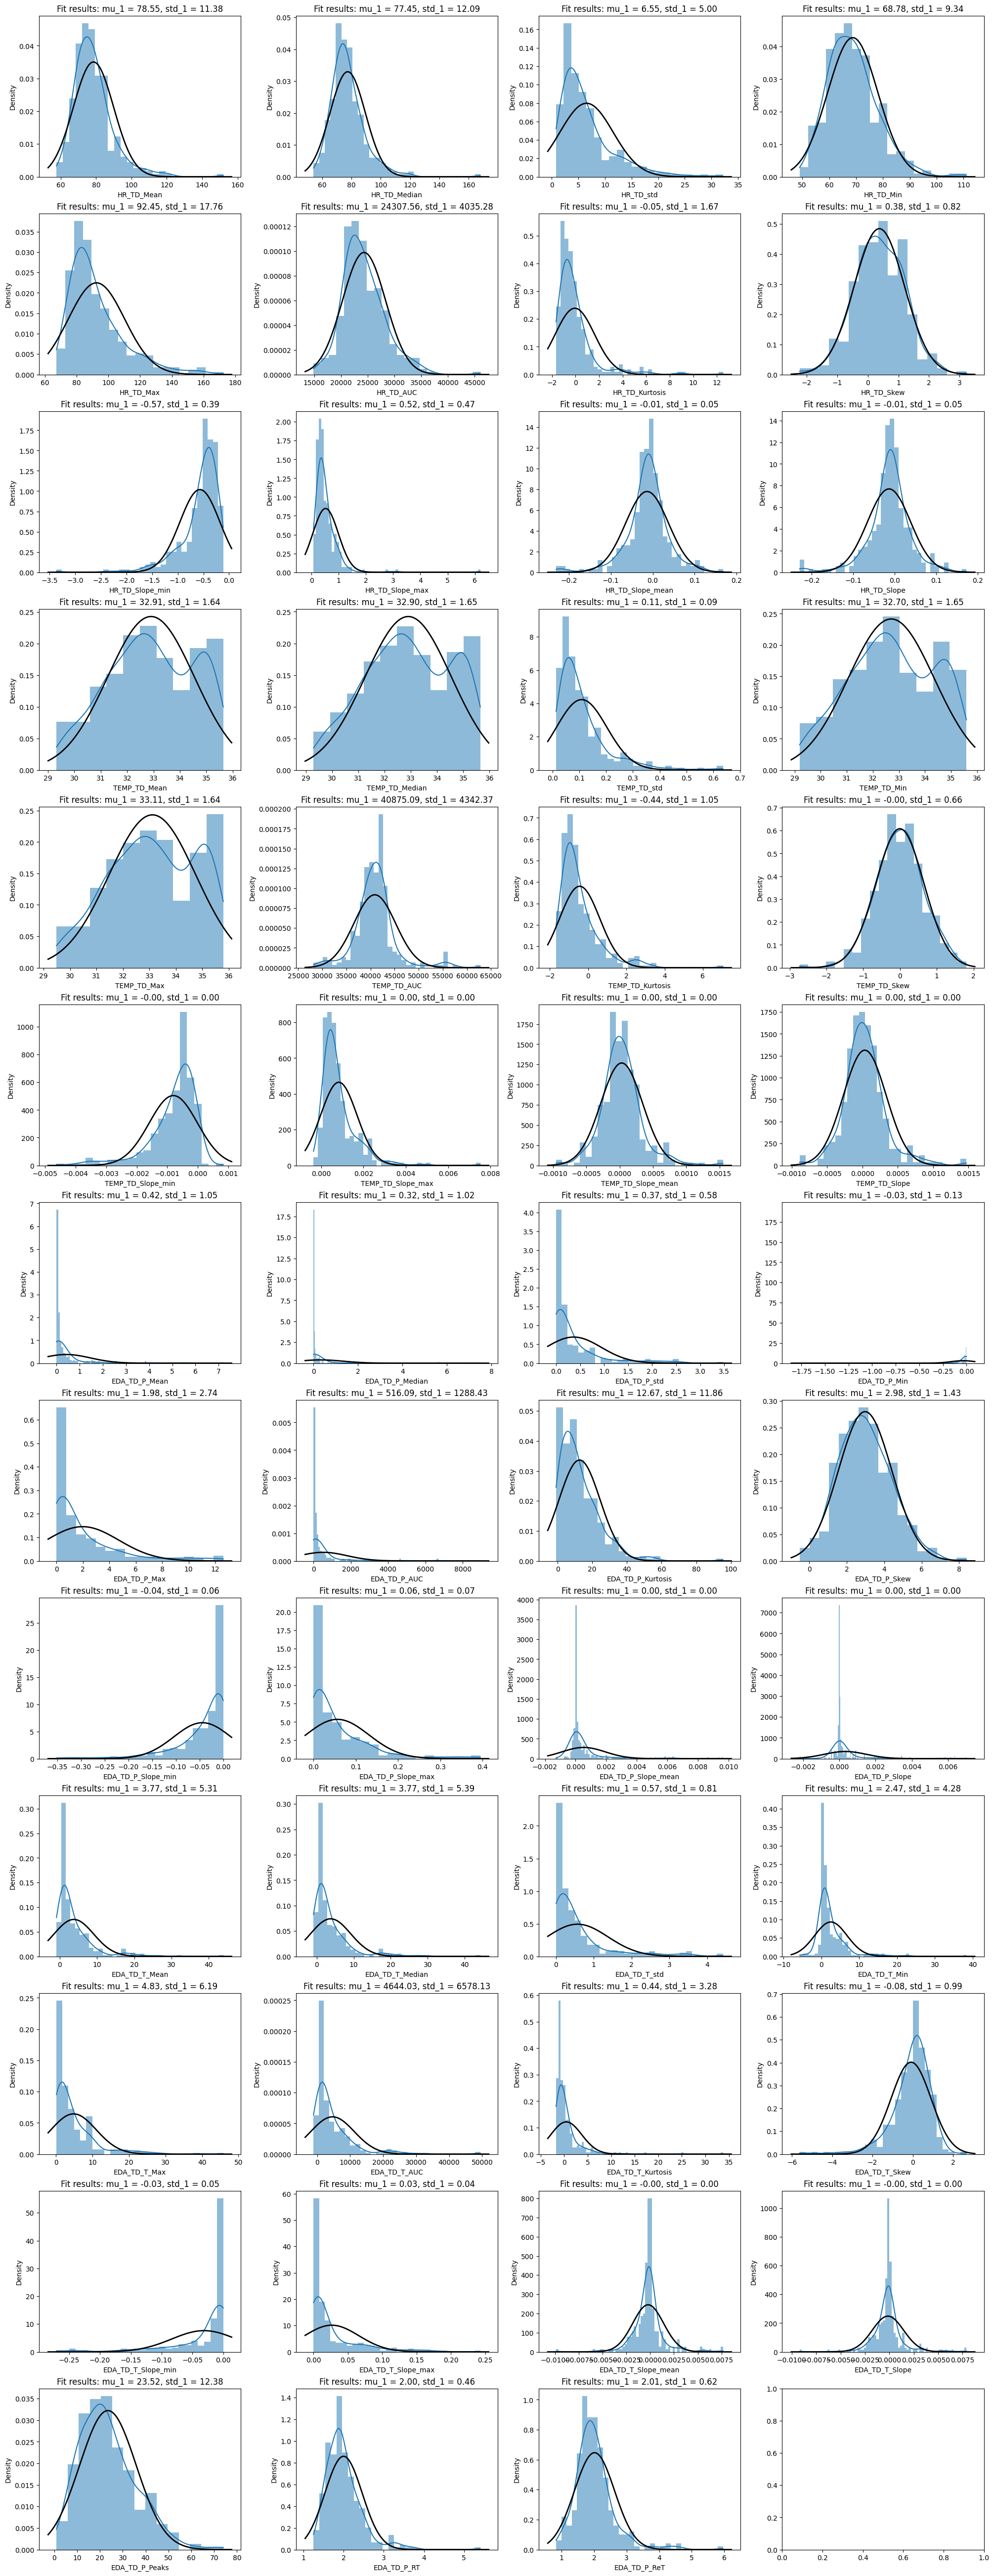

In [5]:
n = len(num_cols)
ncols = 4
nrows = int((len(num_cols)/ncols) + (0 if (len(num_cols)%ncols == 0) else 1))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*4), constrained_layout=True)
# fig.tight_layout()
for i, column in enumerate(num_cols):
    i_col = i % ncols
    i_row = int(i / ncols)
    ax = axs[i_row][i_col]
    X_col = data[column].dropna()
    mean = X_col.mean()
    std = X_col.std()

    sns.histplot(X_col, kde=True, stat='density', linewidth=0, ax=ax, color="tab:blue")
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    ax.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu_1 = {mean:.2f}, std_1 = {std:.2f}"
    ax.set_title(title)
    # ax.legend()
plt.show()

## Outlier detection

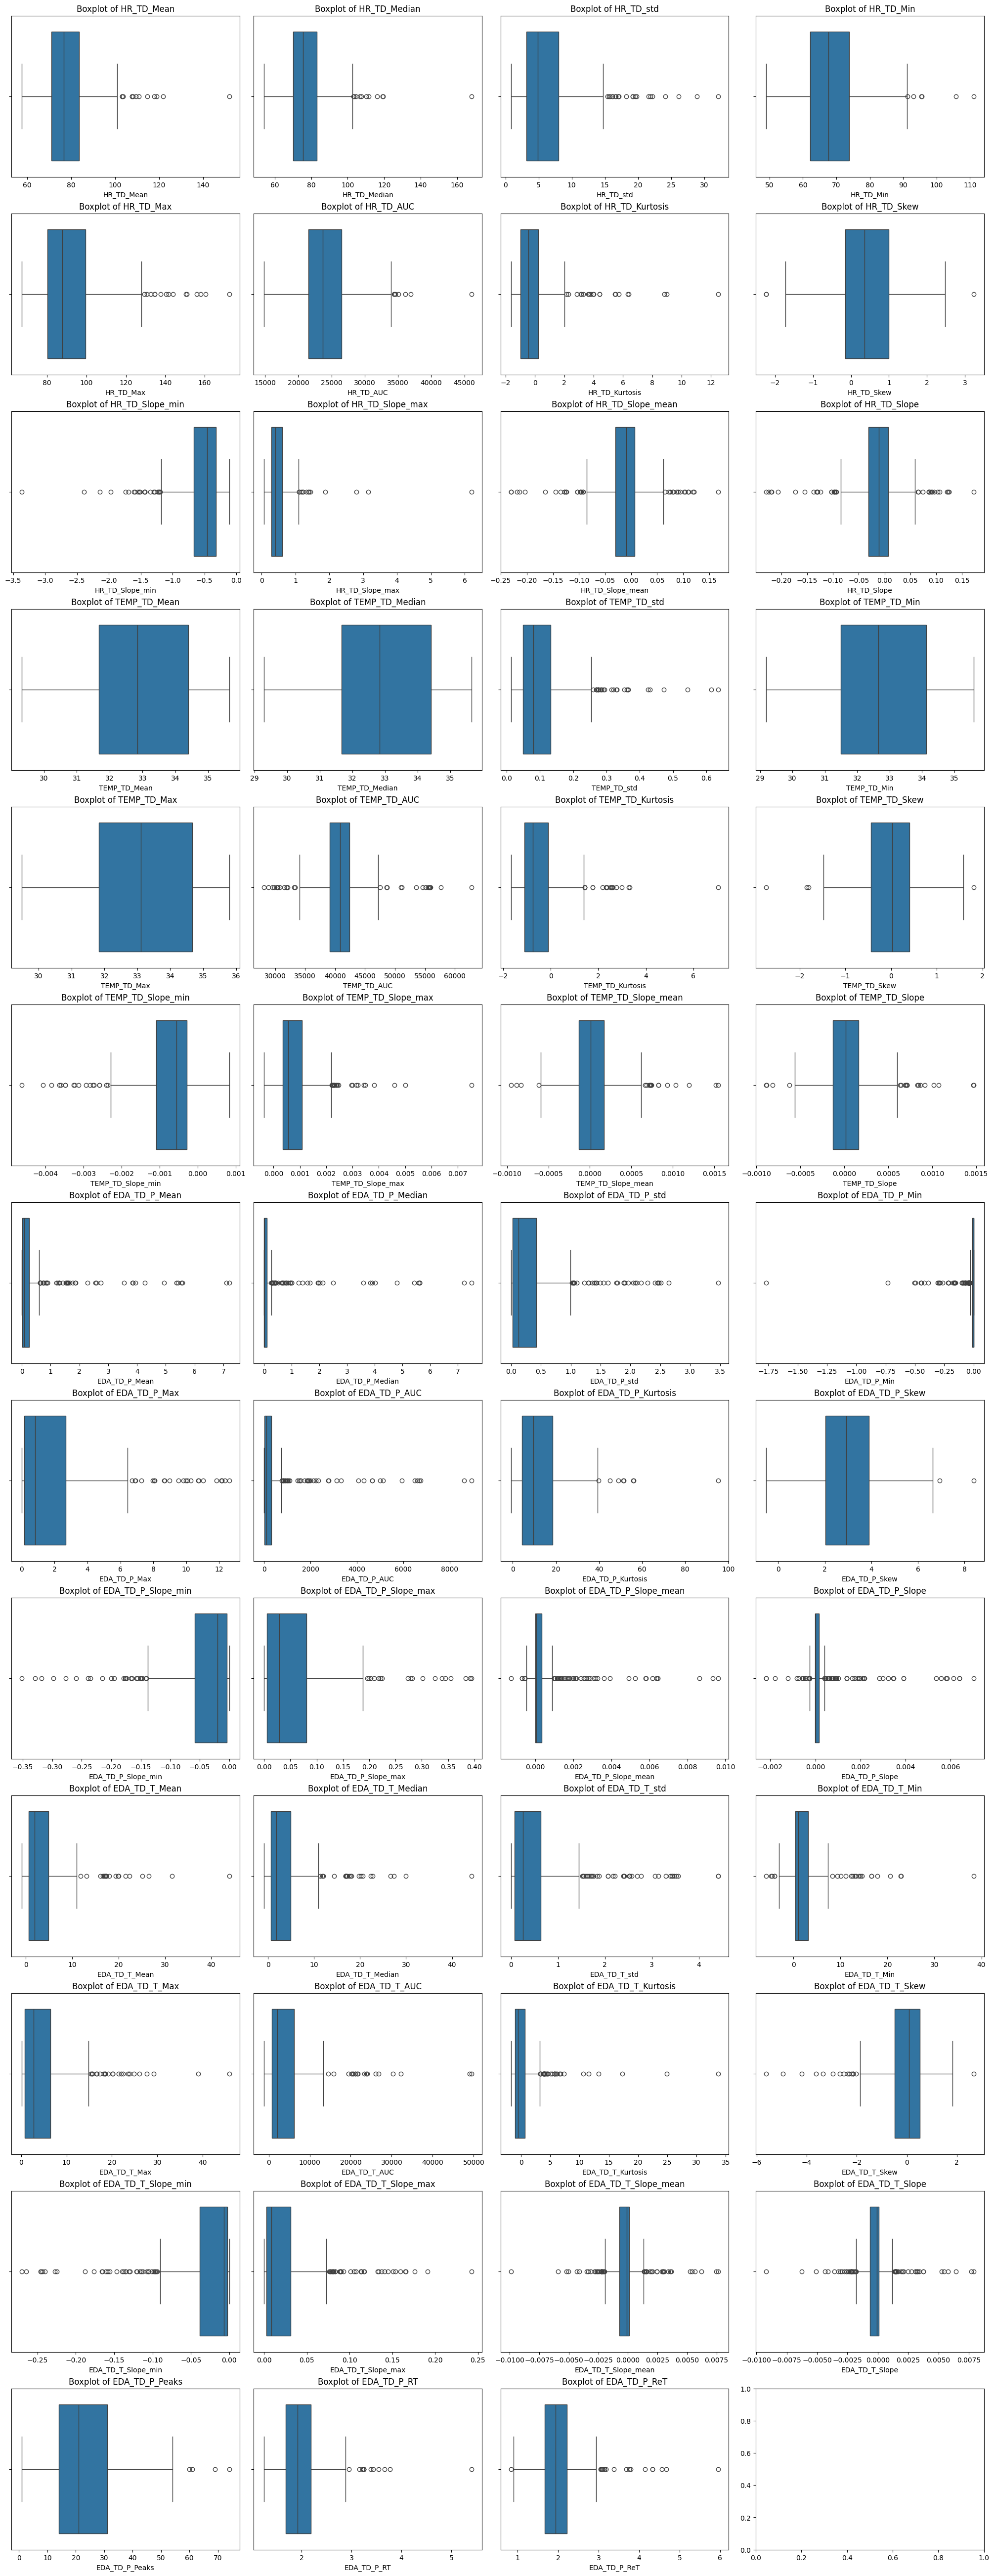

In [6]:
n = len(num_cols)
ncols = 4
nrows = int((len(num_cols)/ncols) + (0 if (len(num_cols)%ncols == 0) else 1))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*4), constrained_layout=True)
# fig.tight_layout()
for i, column in enumerate(num_cols):
    i_col = i % ncols
    i_row = int(i / ncols)
    ax = axs[i_row][i_col]
    X_col = data[column].dropna()
    sns.boxplot(x=X_col, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    # ax.legend()
plt.show()

## Correlation between features

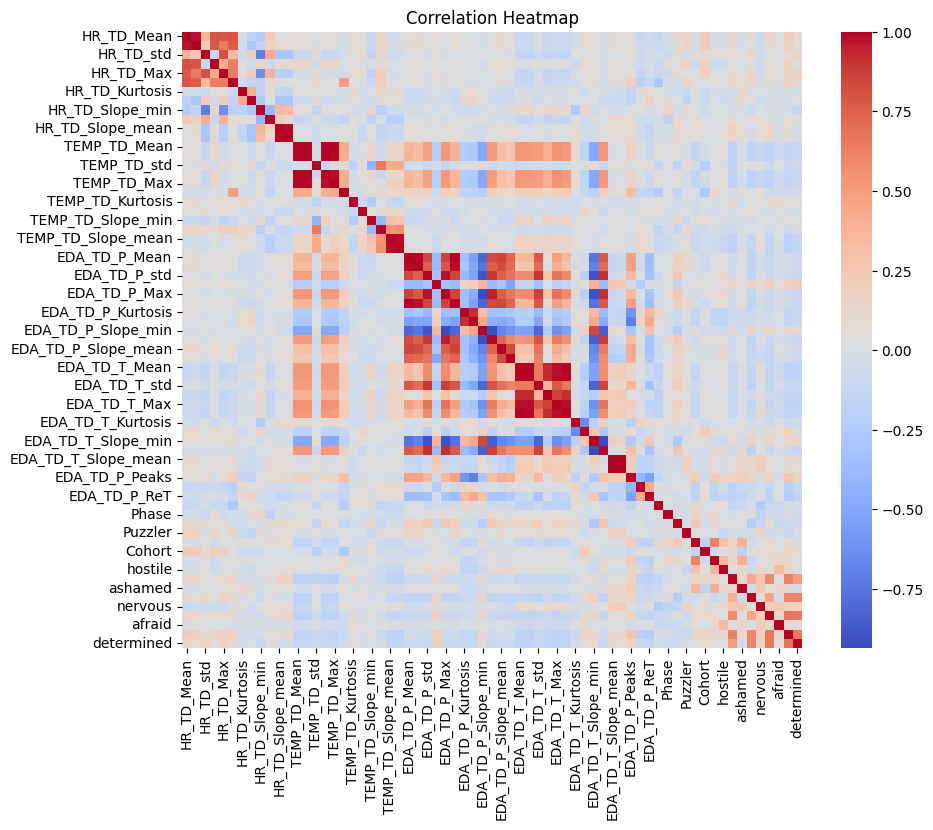

In [7]:
# Correlation heatmap of the numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# More analysis

## Standardize data

In [174]:
# Standardize
def standardize(X):
    X[num_cols] = (X[num_cols] - X[num_cols].mean()) / X[num_cols].std()
    return X

data = standardize(data)

In [9]:
data[cat_cols]

Round  Phase  Individual  Puzzler  Frustrated  Cohort  upset  hostile  \
0        2      2           1        1         2.0       3    1.0      1.0   
1        2      1           1        1         3.0       3    2.0      1.0   
2        2      0           1        1         2.0       3    1.0      1.0   
3        1      2           1        1         2.0       3    1.0      1.0   
4        1      1           1        1         2.0       3    3.0      1.0   
..     ...    ...         ...      ...         ...     ...    ...      ...   
307      3      1          26        1         7.0       4    3.0      2.0   
308      3      0          26        1         2.0       4    2.0      1.0   
309      0      2          26        1         2.0       4    1.0      1.0   
310      0      1          26        1         3.0       4    2.0      1.0   
311      0      0          26        1         0.0       4    1.0      1.0   

     alert  ashamed  inspired  nervous  attentive  afraid  active  determined  
0      2.0      1.0       2.0      2.0        3.0     1.0     2.0         2.0  
1      3.0      2.0       2.0      2.0        3.0     1.0     3.0         3.0  
2      2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
3      2.0      1.0       3.0      2.0        3.0     2.0     3.0         3.0  
4      3.0      2.0       3.0      3.0        4.0     2.0     4.0         4.0  
..     ...      ...       ...      ...        ...     ...     ...         ...  
307    2.0      1.0       1.0      1.0        1.0     1.0     3.0         1.0  
308    3.0      1.0       1.0      1.0        4.0     1.0     3.0         4.0  
309    3.0      1.0       3.0      1.0        3.0     1.0     3.0         4.0  
310    3.0      1.0       3.0      1.0        4.0     1.0     4.0         4.0  
311    2.0      1.0       2.0      2.0        4.0     1.0     3.0         4.0  

[312 rows x 16 columns]

## Treat missing data

In [175]:
data = data.dropna()

## Save data

In [176]:
individuals = data["Individual"]
cohorts = data["Cohort"]
puzzlers = data["Puzzler"]

In [177]:
exclude_columns = ["Individual"]
data = data[[c for c in num_cols if c not in exclude_columns] + [c for c in cat_cols if c not in exclude_columns]]

## One-Hot Encode

In [178]:
# List of columns you want to one-hot encode
columns_to_encode = ["Cohort", "Puzzler"
                    #  , "Individual"
                     ]
saved_encoded_columns = data[columns_to_encode]
# Perform one-hot encoding on specified columns
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

# Display the first few rows of the updated dataset
print("First few rows of the updated dataset with one-hot encoding:")
print(encoded_data.head())

data = encoded_data

First few rows of the updated dataset with one-hot encoding:
   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010007     -0.062252   0.186914  -0.163617   0.001626  -0.312025   
1   -0.176517     -0.069694  -0.792361   0.111511  -0.569893  -0.086150   
2   -0.033069      0.038626  -0.773057   0.368440  -0.543429  -0.987033   
3    0.397420      0.531440   0.163620   0.068689   0.206585   0.152837   
4   -0.550724     -0.375636  -0.670533  -0.409841  -0.702215  -0.311121   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  active  \
0       -0.620396   -0.007311        -0.414192         0.976552  ...     2.0   
1       -0.114098   -0.045208         0.531521        -0.698825  ...     3.0   
2       -0.335849   -0.739221        -0.158594        -0.342475  ...     3.0   
3       -0.485856   -0.512212         0.263143         0.279808  ...     3.0   
4        0.152625   -1.137219         0.499571        -0.385024  ...     4.0   

   dete

In [42]:
data.columns

Index(['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT', 'Round', 

# PCA Analysis

# General PCA

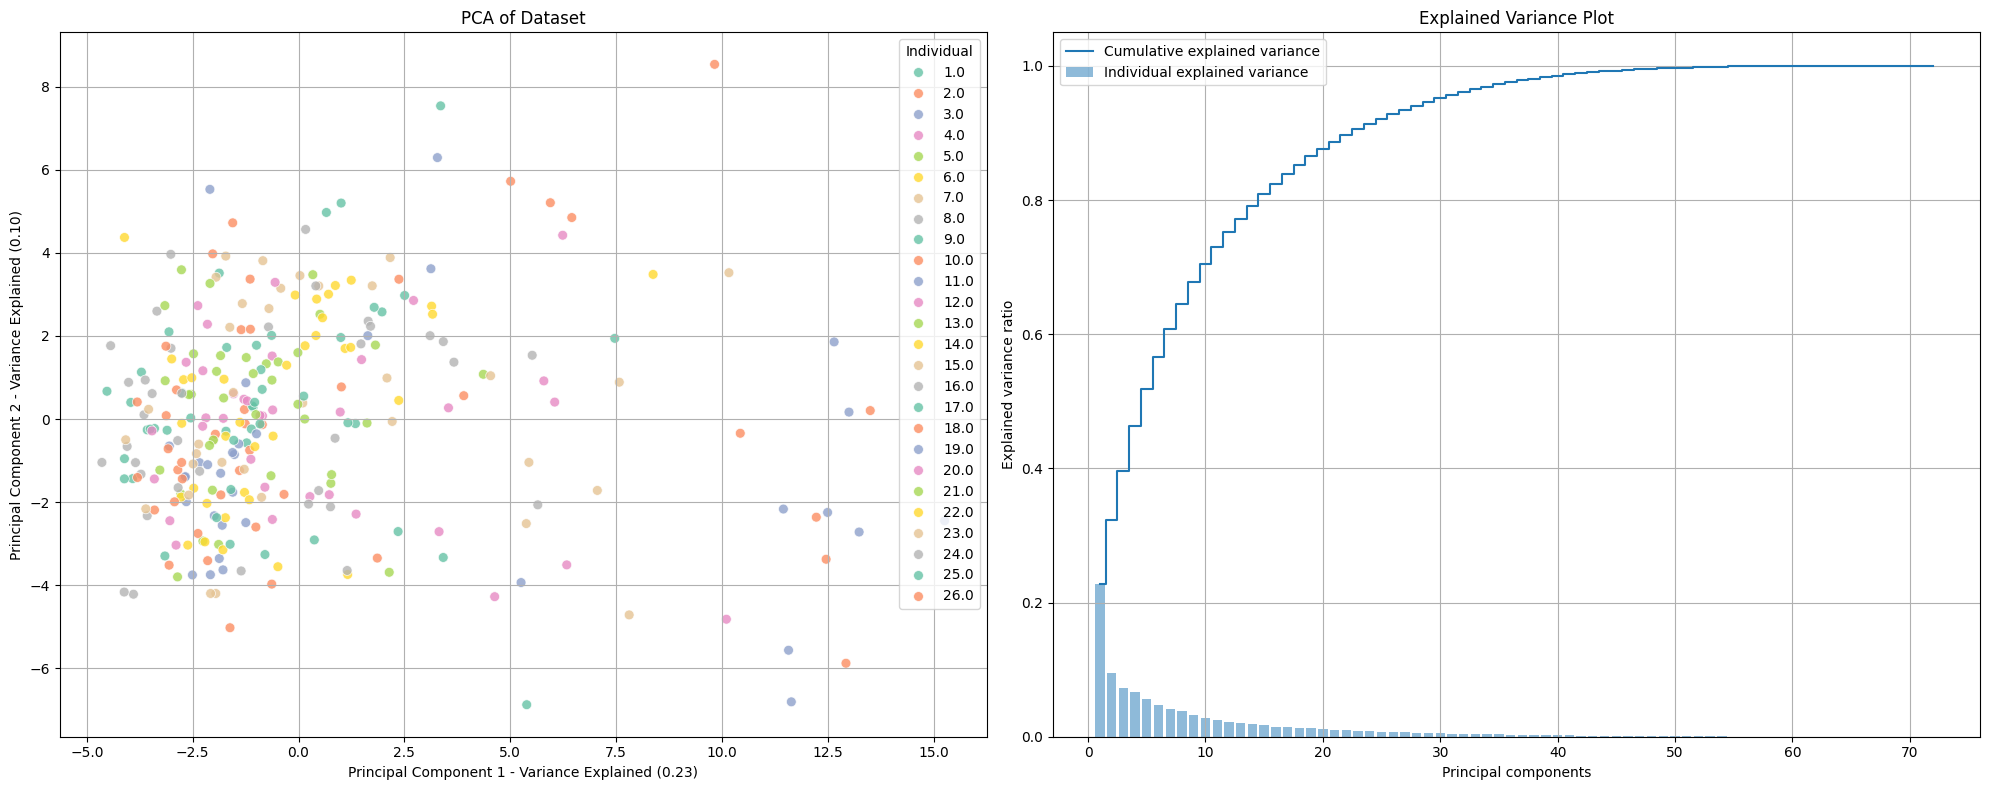

In [67]:
from sklearn.decomposition import PCA
# PCA
pca = PCA()  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data)
principal_df = pd.DataFrame(data=principal_components[:,[0,1]], columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting
fig, axs = plt.subplots(1, 2,figsize=(20, 8))
ax = axs[0]
sns.scatterplot(x='PC1', y='PC2', hue=individuals, data=principal_df, palette='Set2', s=50, alpha=0.8, edgecolor='w', ax=ax)
ax.set_title('PCA of Dataset')
ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
ax.grid(True)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
ax = axs[1]
# Plotting
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_title('Explained Variance Plot')
ax.legend(loc='best')
ax.grid(True)


plt.tight_layout()
plt.show()

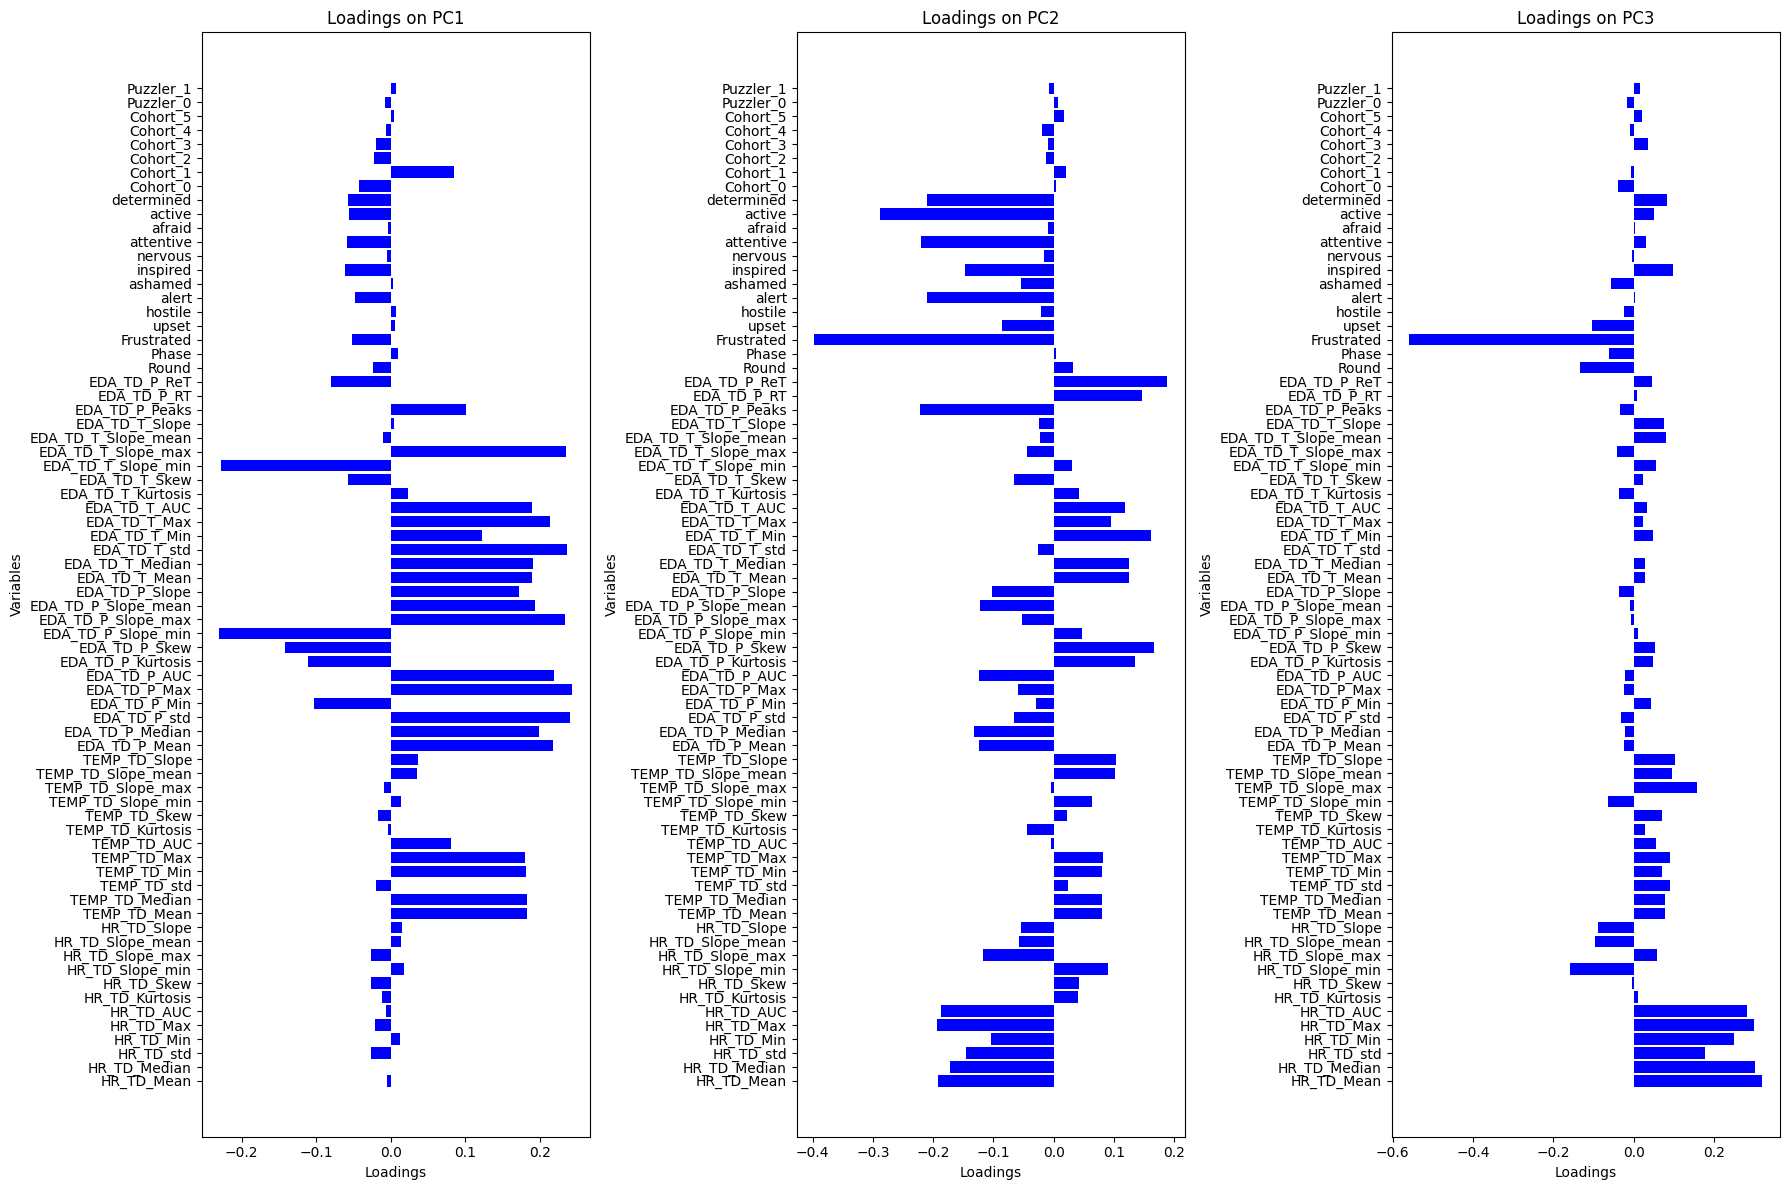

In [68]:
n_to_analyse = 3
# Loadings for the first two principal components
loadings = pca.components_[:n_to_analyse].T  # Transpose to align with the original variables

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(n_to_analyse)], index=data.columns)

# Plotting the loadings
plt.figure(figsize=(18, 12))
for i in range(n_to_analyse):

    plt.subplot(1, n_to_analyse, i+1)
    plt.barh(loadings_df.index, loadings_df[f'PC{i}'], color='b')
    plt.title(f'Loadings on PC{i+1}')
    plt.xlabel('Loadings')
    plt.ylabel('Variables')

plt.tight_layout()
plt.show()

## PCA by numerical columns

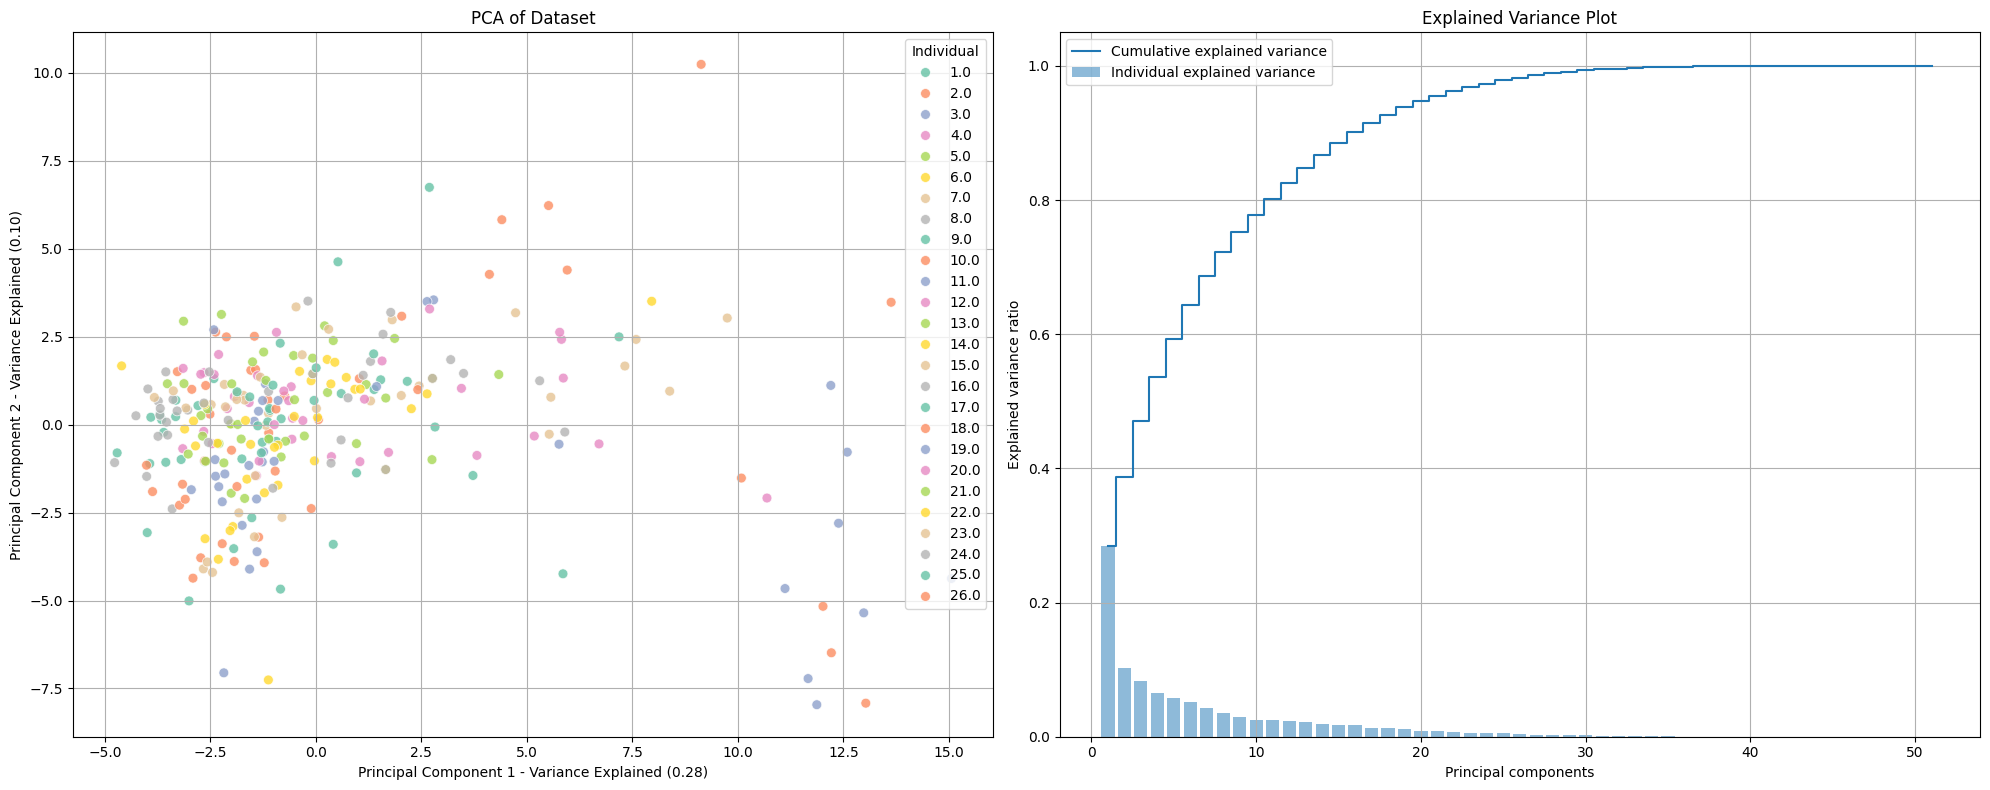

In [72]:
from sklearn.decomposition import PCA
# PCA
pca = PCA()  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data[num_cols])
principal_df = pd.DataFrame(data=principal_components[:,[0,1]], columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting
fig, axs = plt.subplots(1, 2,figsize=(20, 8))
ax = axs[0]
sns.scatterplot(x='PC1', y='PC2', hue=individuals, data=principal_df, palette='Set2', s=50, alpha=0.8, edgecolor='w', ax=ax)
ax.set_title('PCA of Dataset')
ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
ax.grid(True)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
ax = axs[1]
# Plotting
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_title('Explained Variance Plot')
ax.legend(loc='best')
ax.grid(True)


plt.tight_layout()
plt.show()

In [79]:
hr_td_cols = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope']
temp_td_cols = ['TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope']
eda_td_p = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT']
eda_td_t = ['EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

divided_cols = [hr_td_cols, temp_td_cols, eda_td_p, eda_td_t]

In [120]:
n_to_analyse = 3
# Loadings for the first two principal components
loadings = pca.components_[:n_to_analyse].T  # Transpose to align with the original variables
min_value = np.min(loadings)
max_value = np.max(loadings)
margin = 0.1
# Plotting the loadings
plt.figure(figsize=(18, 12))
for j in range(len(divided_cols)):
    # Create a DataFrame for better visualization
    col_mask = [col in divided_cols[j] for col in num_cols]
    loadings_df = pd.DataFrame(loadings[col_mask], columns=[f'PC{i+1}' for i in range(n_to_analyse)], index=data[divided_cols[j]].columns)
    for i in range(n_to_analyse):

        plt.subplot(len(divided_cols), n_to_analyse, n_to_analyse*j+i+1)
        plt.barh(loadings_df.index, loadings_df[f'PC{i+1}'], color='b')
        plt.xlim((min_value-margin, max_value+margin))
        plt.title(f'Loadings on PC{i+1}')
        plt.xlabel('Loadings')
        plt.ylabel('Variables')

plt.tight_layout()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 61 but corresponding boolean dimension is 51

<Figure size 1800x1200 with 0 Axes>

## PCA by numerical and questionnaire features

In [121]:
cat_cols[6:]

Index(['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined'],
      dtype='object')

In [161]:
hr_td_cols = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope']
temp_td_cols = ['TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope']
eda_td_p_cols = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT']
eda_td_t_cols = ['EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

quest_cols = [cat_cols[4]] + list(cat_cols[6:])

divided_cols = [hr_td_cols, temp_td_cols, eda_td_p_cols, eda_td_t_cols, quest_cols]

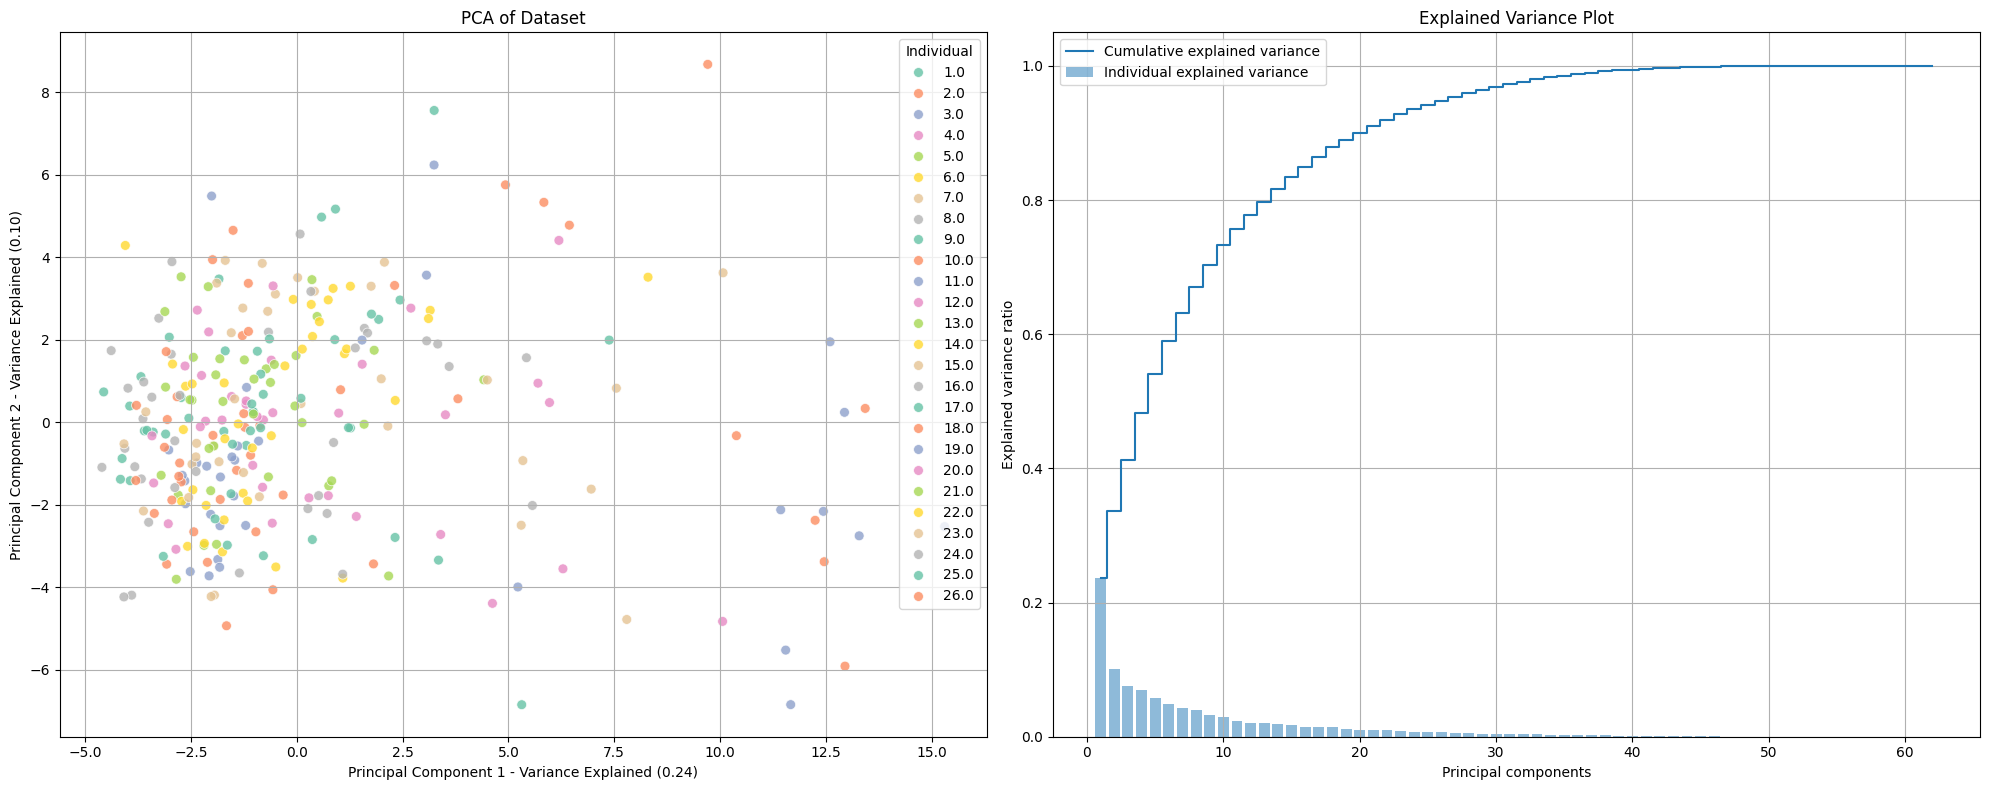

In [181]:
from sklearn.decomposition import PCA
pca_features = list(num_cols) + list(quest_cols)
# PCA
pca = PCA()  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data[pca_features])
principal_df = pd.DataFrame(data=principal_components[:,[0,1]], columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting
fig, axs = plt.subplots(1, 2,figsize=(20, 8))
ax = axs[0]
sns.scatterplot(x='PC1', y='PC2', hue=individuals, data=principal_df, palette='Set2', s=50, alpha=0.8, edgecolor='w', ax=ax)
ax.set_title('PCA of Dataset')
ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
ax.grid(True)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
ax = axs[1]
# Plotting
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_title('Explained Variance Plot')
ax.legend(loc='best')
ax.grid(True)


plt.tight_layout()
plt.show()

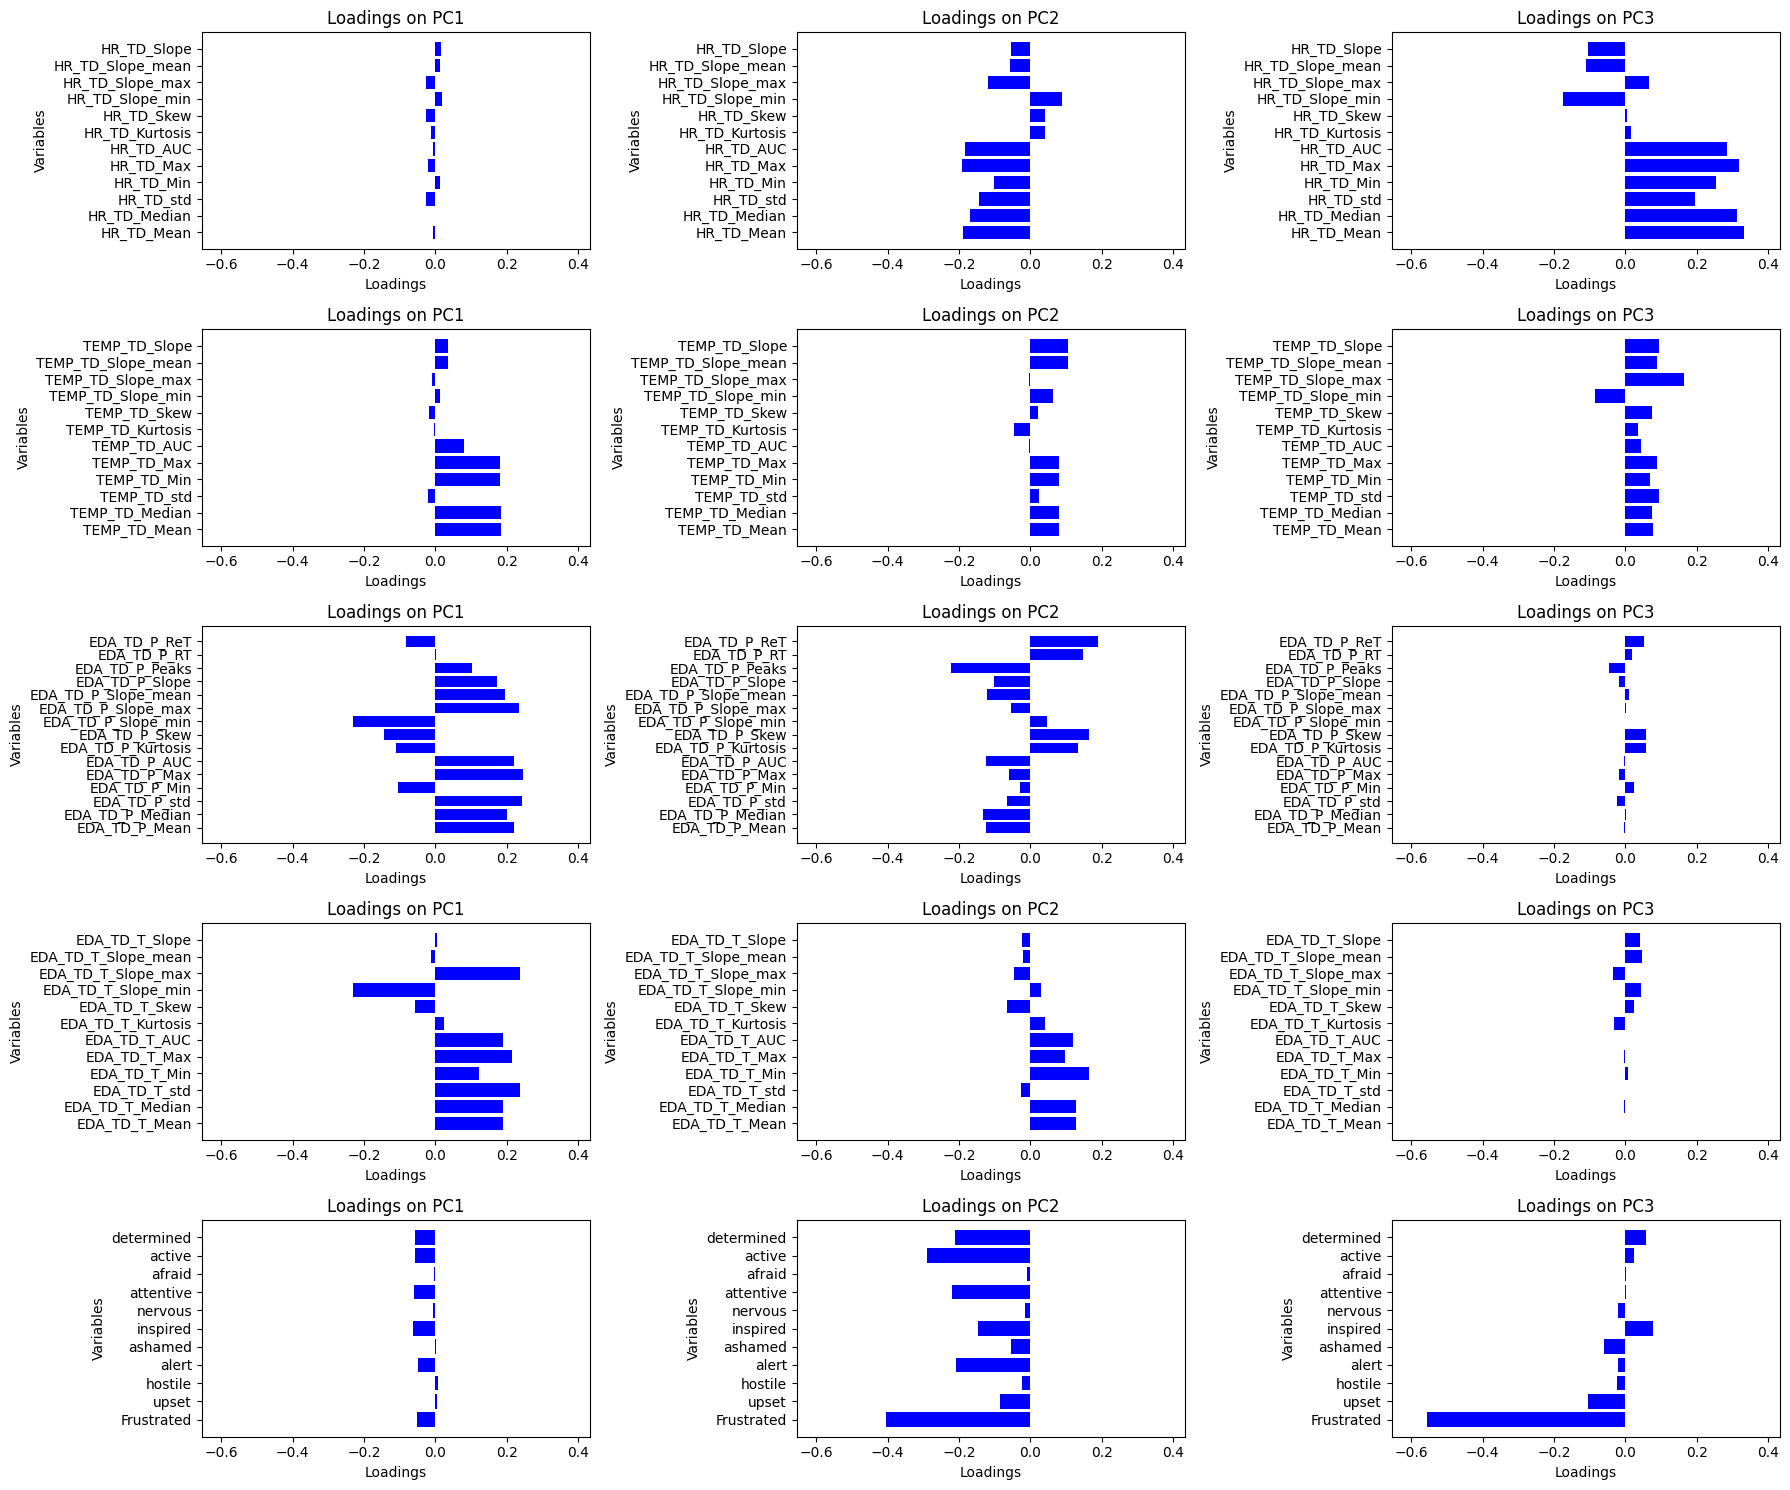

In [182]:
n_to_analyse = 3
# Loadings for the first two principal components
loadings = pca.components_[:n_to_analyse].T  # Transpose to align with the original variables
min_value = np.min(loadings)
max_value = np.max(loadings)
margin = 0.1
# Plotting the loadings
plt.figure(figsize=(n_to_analyse*6, len(divided_cols)*3))
for j in range(len(divided_cols)):
    # Create a DataFrame for better visualization
    col_mask = [col in divided_cols[j] for col in pca_features]
    loadings_df = pd.DataFrame(loadings[col_mask], columns=[f'PC{i+1}' for i in range(n_to_analyse)], index=data[divided_cols[j]].columns)
    for i in range(n_to_analyse):

        plt.subplot(len(divided_cols), n_to_analyse, n_to_analyse*j+i+1)
        plt.barh(loadings_df.index, loadings_df[f'PC{i+1}'], color='b')
        plt.xlim((min_value-margin, max_value+margin))
        plt.title(f'Loadings on PC{i+1}')
        plt.xlabel('Loadings')
        plt.ylabel('Variables')

plt.tight_layout()
plt.show()

In [183]:
quest_cols

['Frustrated',
 'upset',
 'hostile',
 'alert',
 'ashamed',
 'inspired',
 'nervous',
 'attentive',
 'afraid',
 'active',
 'determined']

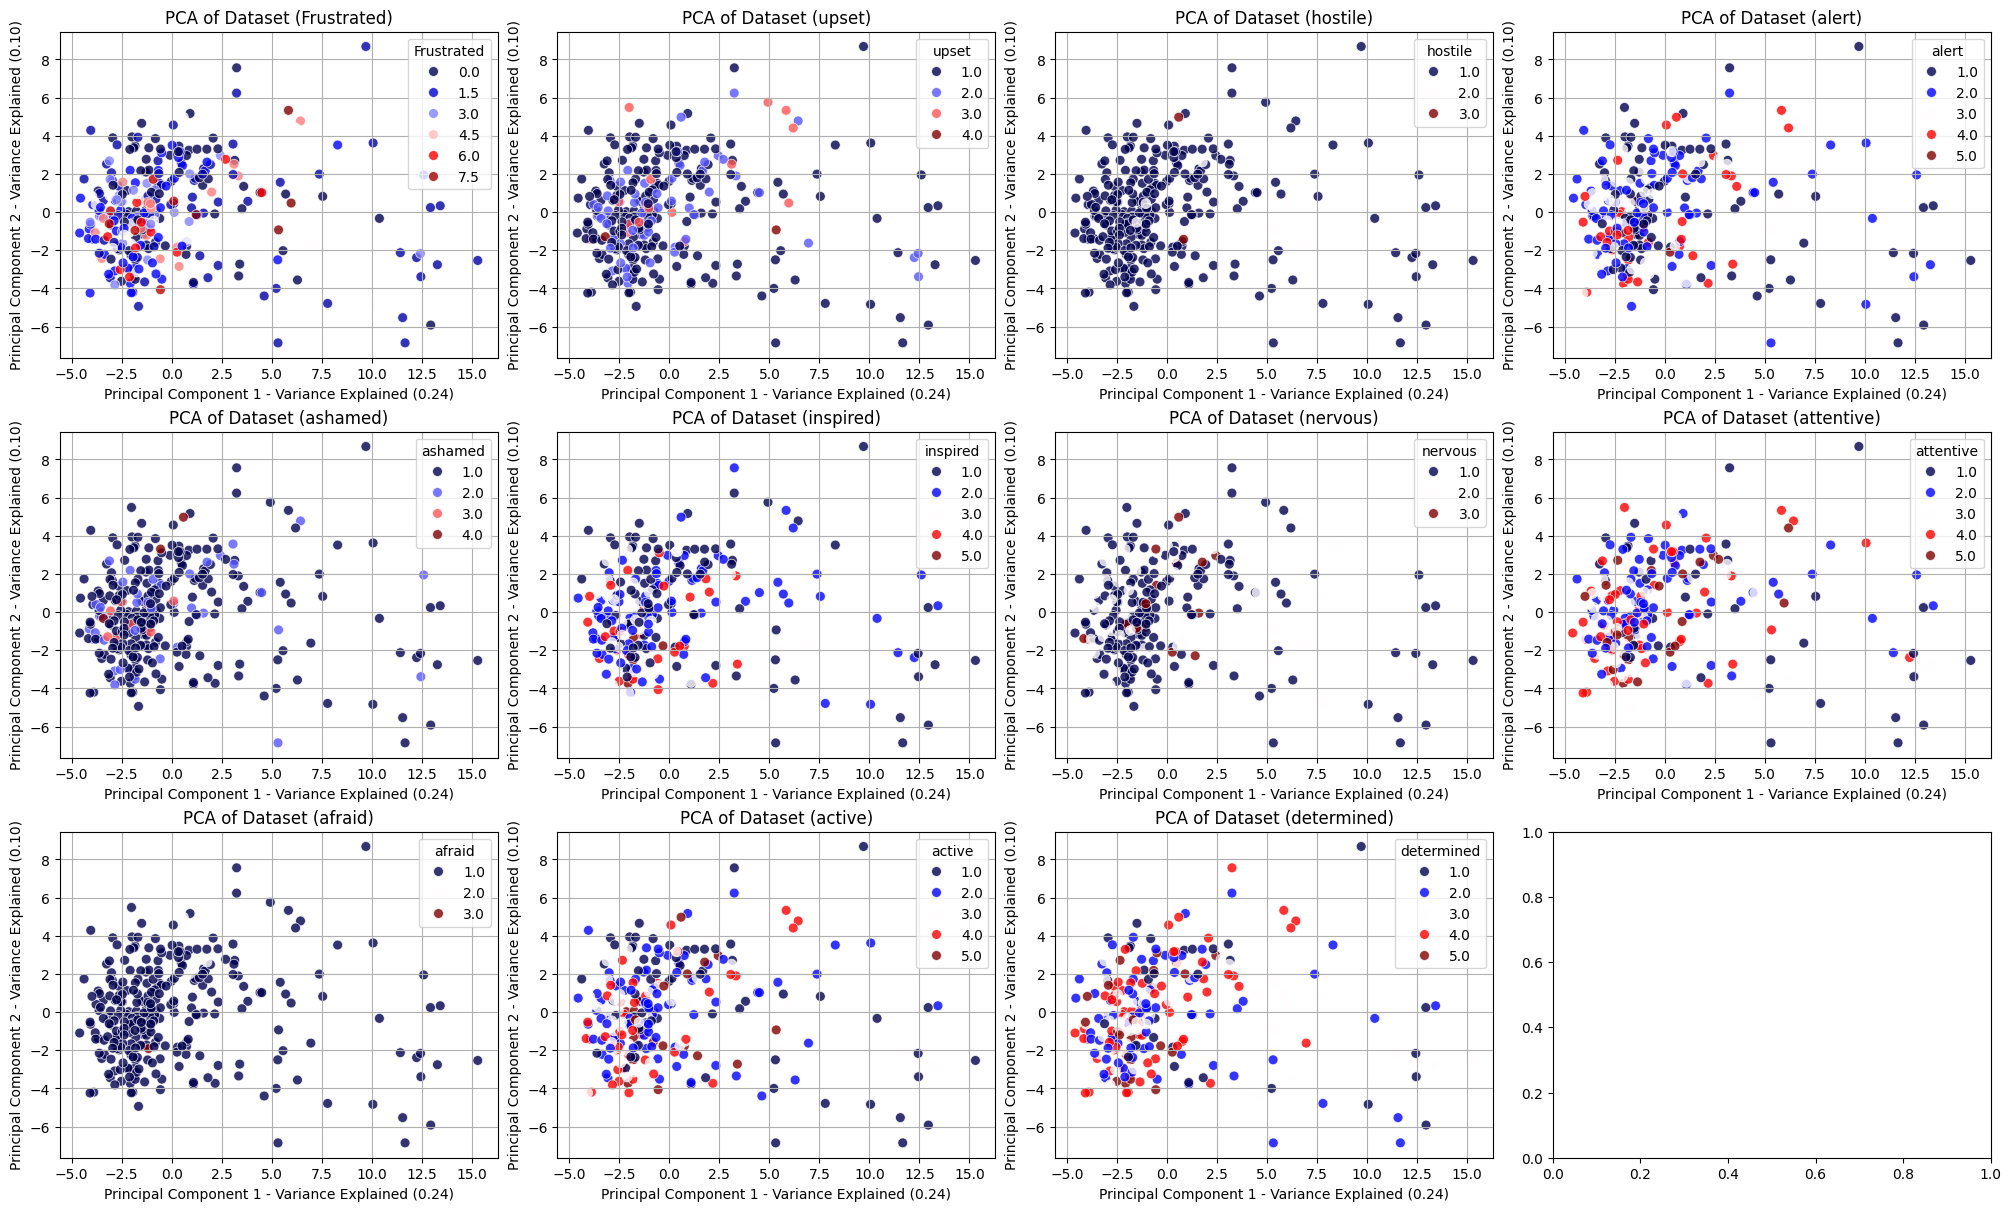

In [184]:
n = len(quest_cols)
ncols = 4
nrows = int((len(quest_cols)/ncols) + (0 if (len(quest_cols)%ncols == 0) else 1))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*4), constrained_layout=True)
# fig.tight_layout()
for i, column in enumerate(quest_cols):
    i_col = i % ncols
    i_row = int(i / ncols)
    ax = axs[i_row][i_col]

    # Plotting
    sns.scatterplot(x='PC1', y='PC2', hue=data[quest_cols[i]], data=principal_df, palette='seismic', s=50, alpha=0.8, edgecolor='w', ax=ax)
    ax.set_title(f'PCA of Dataset ({quest_cols[i]})')
    ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
    ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
    ax.grid(True)

In [139]:
cat_cols

Index(['Round', 'Phase', 'Individual', 'Puzzler', 'Frustrated', 'Cohort',
       'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'attentive', 'afraid', 'active', 'determined'],
      dtype='object')

In [140]:
order = data['Round']*3+data['Phase']

In [189]:
def get_data(col):
    if col in data.columns:
        return data[col]
    return saved_encoded_columns[col]

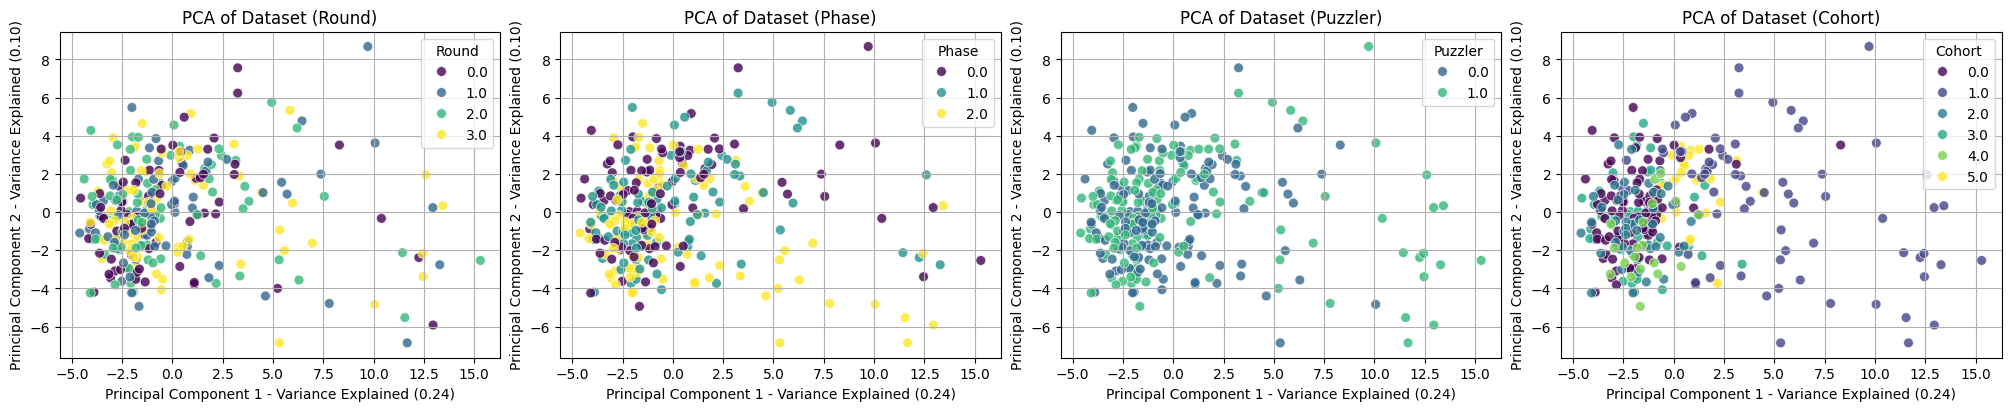

In [193]:
cols = ['Round', 'Phase', 'Puzzler', 'Cohort']
n = len(cols)
ncols = 4
nrows = int((len(cols)/ncols) + (0 if (len(cols)%ncols == 0) else 1))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*4), constrained_layout=True)
# fig.tight_layout()
for i, column in enumerate(cols):
    i_col = i % ncols
    i_row = int(i / ncols)
    if nrows == 1 and ncols == 1:
        ax = axs
    elif nrows == 1:
        ax = axs[i_col]
    elif ncols == 1:
        ax = axs[i_row]
    else:
        ax = axs[i_row][i_col]

    # Plotting
    sns.scatterplot(x='PC1', y='PC2', hue=get_data(cols[i]), data=principal_df, palette='viridis', s=50, alpha=0.8, edgecolor='w', ax=ax)
    ax.set_title(f'PCA of Dataset ({cols[i]})')
    ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
    ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
    ax.grid(True)

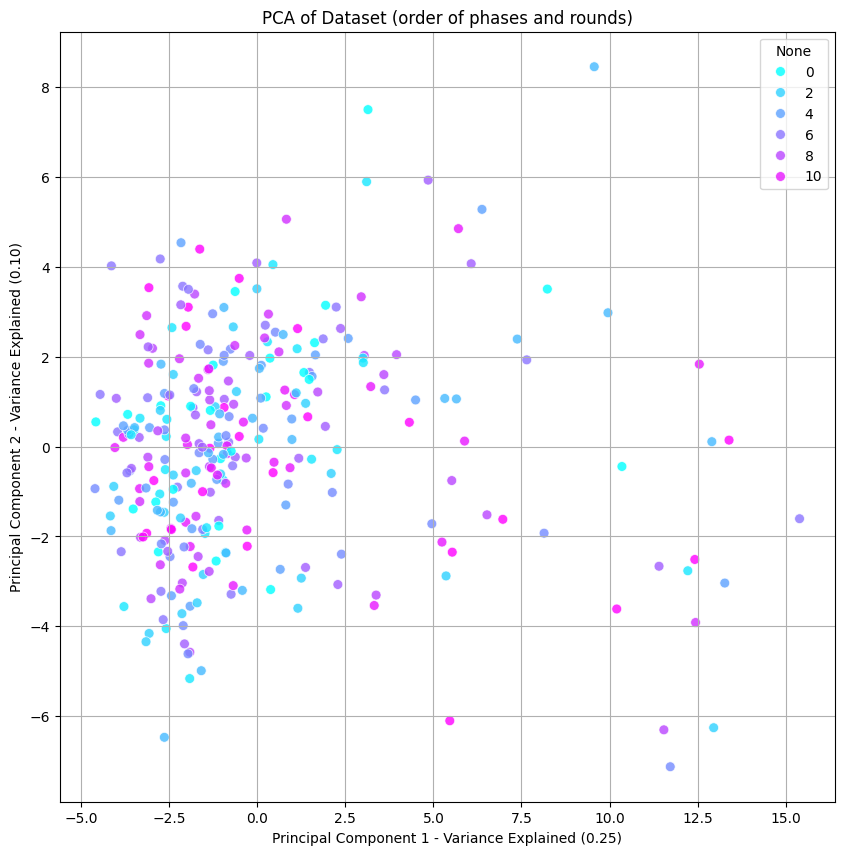

In [151]:
# Plotting
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', hue=order, data=principal_df, palette='cool', s=50, alpha=0.8, edgecolor='w', ax=ax)
ax.set_title(f'PCA of Dataset (order of phases and rounds)')
ax.set_xlabel(f'Principal Component 1 - Variance Explained ({explained_variance[0]:.2f})')
ax.set_ylabel(f'Principal Component 2 - Variance Explained ({explained_variance[1]:.2f})')
ax.grid(True)